In [1]:
#import the necessary liblaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
# Tensorflow and Keras Modules
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

2025-04-14 08:15:40.973813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744618541.231612     646 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744618541.300723     646 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#directory
BASE_DIR = "/kaggle/input/utkface-new/UTKFace"

# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

In [3]:
#create a loop for all dataset images
for filename in (os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [4]:
#chek the image paths
image_paths[:10]

['/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg',
 '/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg']

In [5]:
 #convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1


In [6]:
# change the label of the gender
gender_dict = {0:'Male', 1:'Female'}

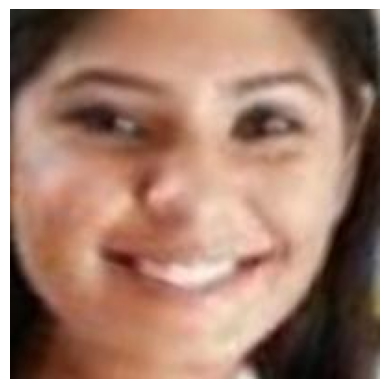

In [7]:
#import pillow lib
from PIL import Image
#open the second image
img = Image.open(df['image'][2])
plt.axis('off')
#show it
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

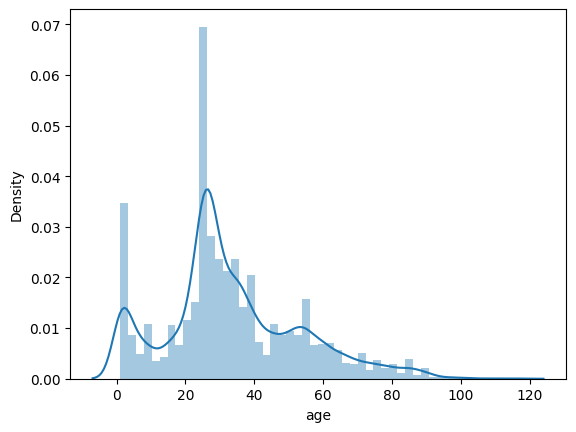

In [8]:
#check the age distribution
sns.distplot(df['age'])

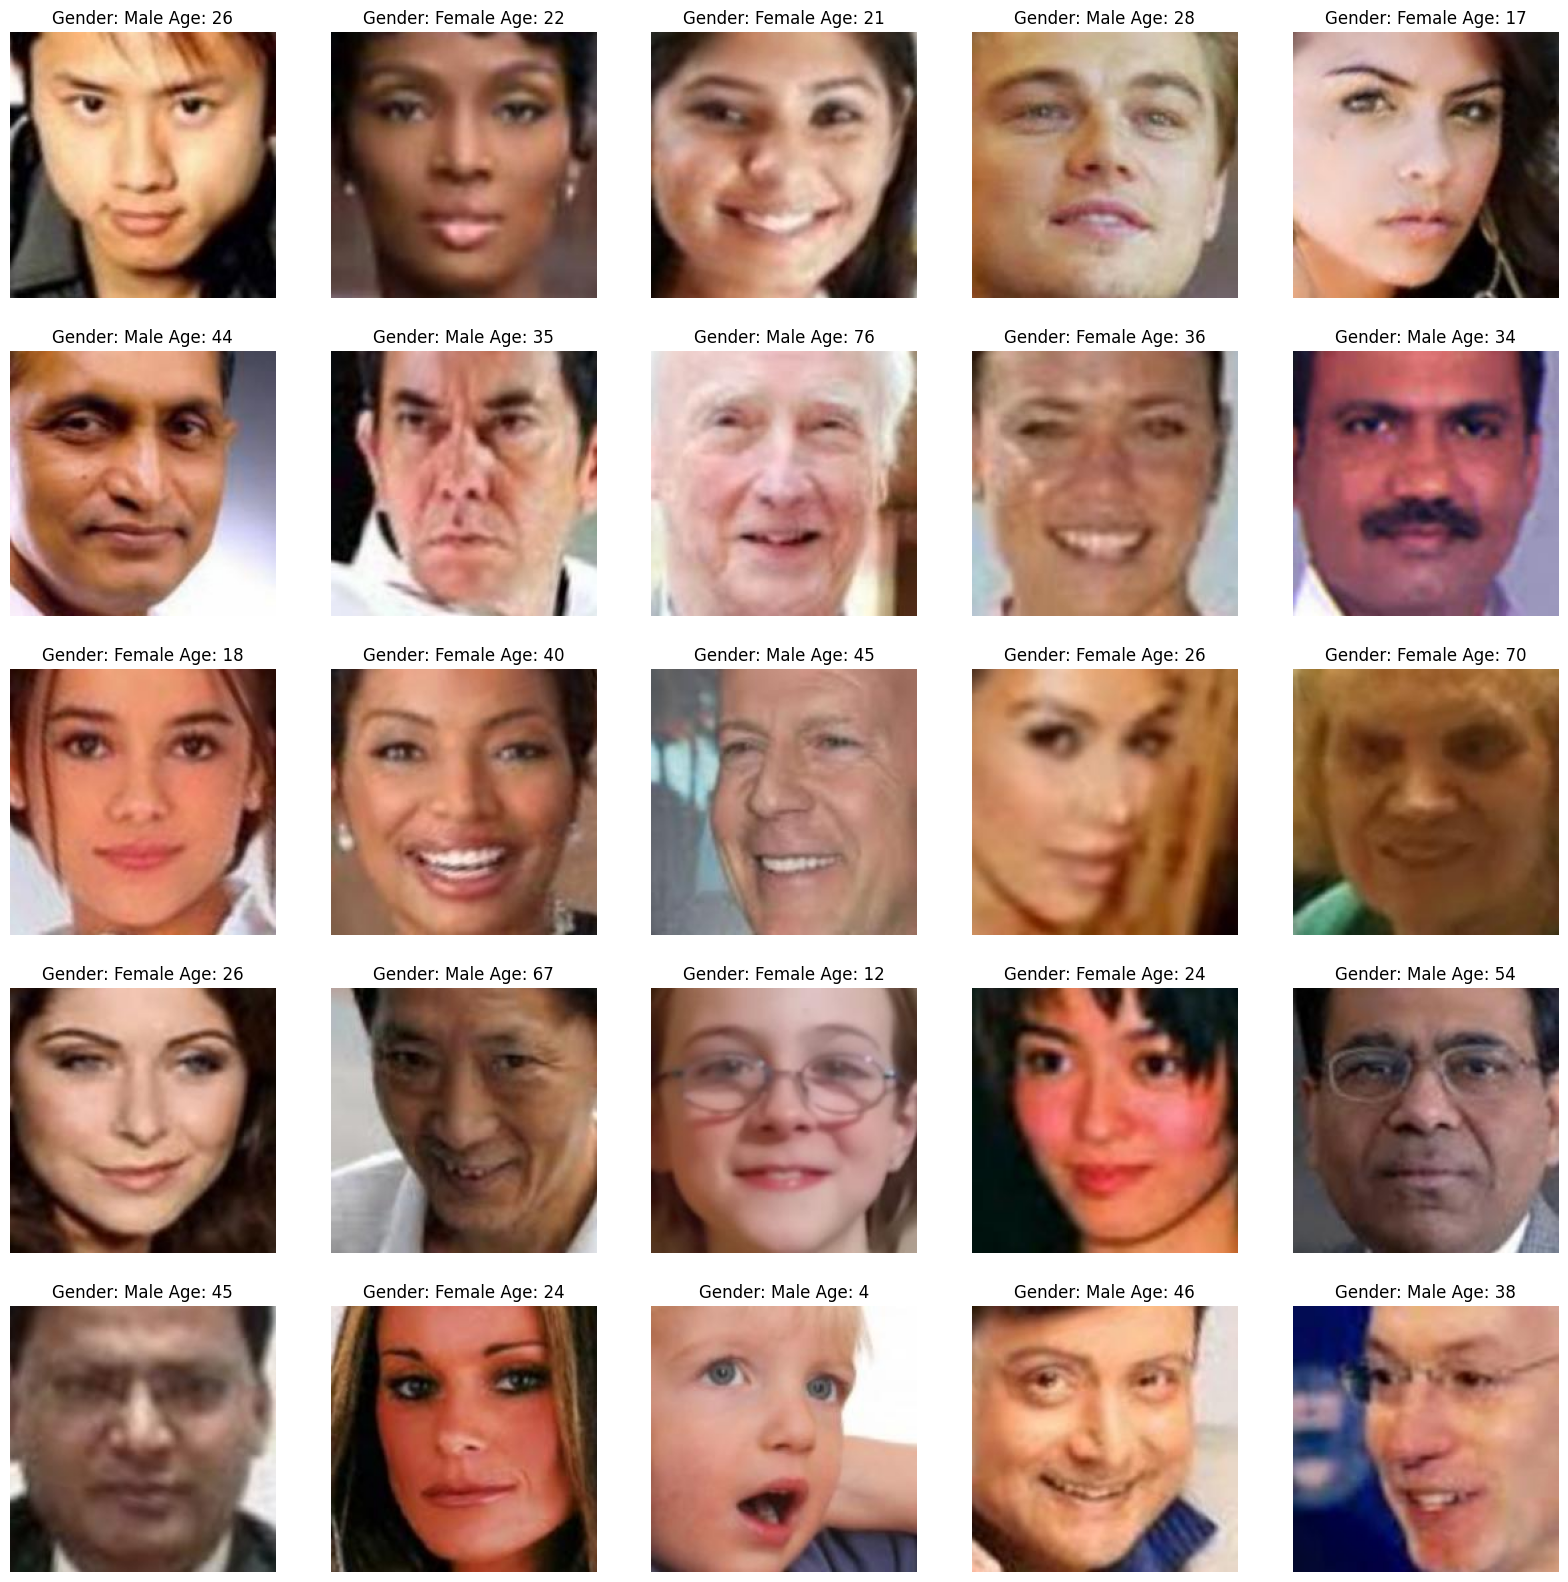

In [10]:
#show some examples
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender_dict[gender]} Age: {age}")
    plt.axis('off')

In [11]:
def extract_features(images):
    features = []
    for image in images:
        # change to gray image
        img = load_img(image,color_mode='grayscale')
        #resize by 128*128
        img = img.resize((128, 128), Image.Resampling.LANCZOS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [12]:
X = extract_features(df['image'])
X.shape

(23708, 128, 128, 1)

In [13]:
X = X/255.0

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

print(y_age)

[26 22 21 ...  2 65 66]


In [16]:
#Create Model
input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)


flatten = Flatten() (maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=[['accuracy'],['accuracy']])

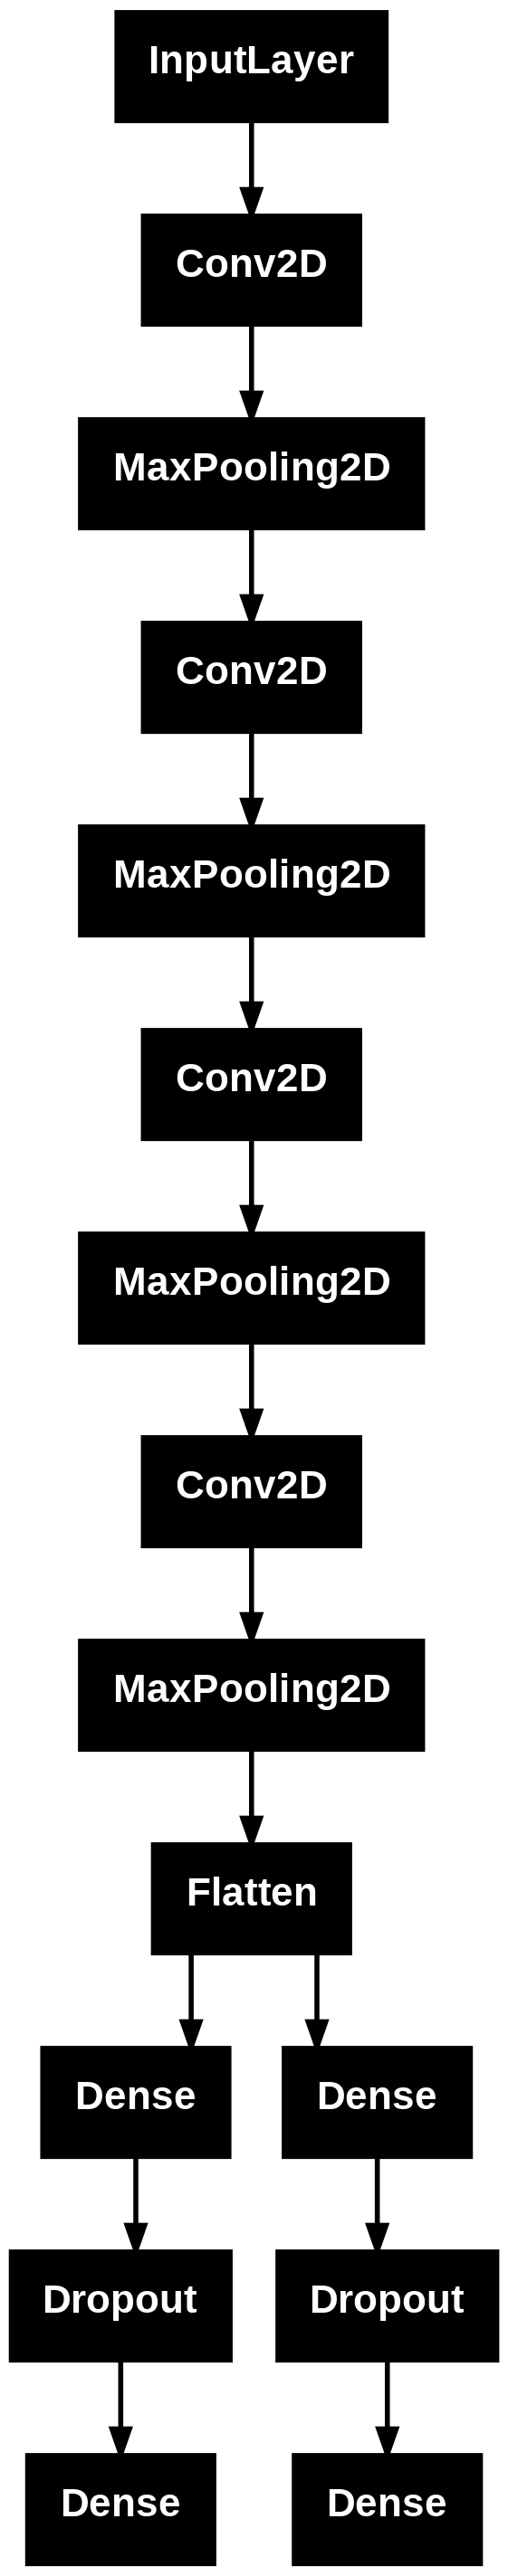

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [18]:
    history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


I0000 00:00:1744618759.884759     706 service.cc:148] XLA service 0x7c2f00005200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744618759.885606     706 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744618759.885631     706 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744618760.338301     706 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/593 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - age_out_accuracy: 0.0161 - age_out_loss: 34.7610 - gender_out_accuracy: 0.3986 - gender_out_loss: 0.7184 - loss: 35.4794     

I0000 00:00:1744618764.578869     706 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


593/593 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - age_out_accuracy: 0.0477 - age_out_loss: 16.9688 - gender_out_accuracy: 0.5069 - gender_out_loss: 0.7005 - loss: 17.6694 - val_age_out_accuracy: 0.0462 - val_age_out_loss: 13.3192 - val_gender_out_accuracy: 0.6584 - val_gender_out_loss: 0.6204 - val_loss: 13.9094
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - age_out_accuracy: 0.0416 - age_out_loss: 12.5080 - gender_out_accuracy: 0.7097 - gender_out_loss: 0.5658 - loss: 13.0738 - val_age_out_accuracy: 0.0179 - val_age_out_loss: 10.0039 - val_gender_out_accuracy: 0.8020 - val_gender_out_loss: 0.4658 - val_loss: 10.4657
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - age_out_accuracy: 0.0173 - age_out_loss: 10.3083 - gender_out_accuracy: 0.7917 - gender_out_loss: 0.4482 - loss: 10.7565 - val_age_out_accuracy: 0.0181 - val_age_out_loss: 8.9904 - val_gender_out_accuracy: 0.8102 - val_gender_out_loss: 0.4069 - val_loss: 9.4014
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step

In [19]:
model.save("gender_age_detection_model1.h5")

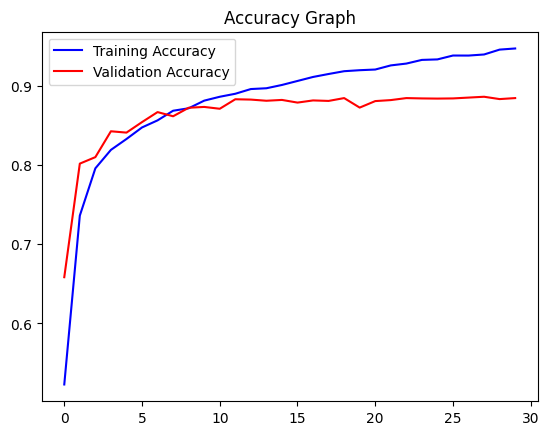

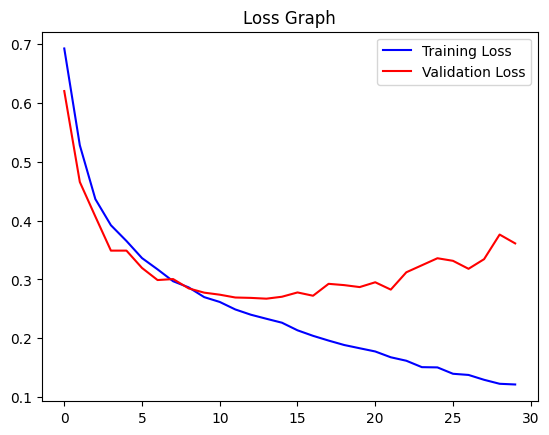

In [20]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#for loss function
loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 38
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
Predicted Gender: Male Predicted Age: 42


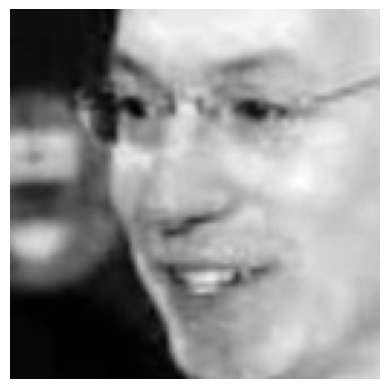

In [21]:
#random number for get image
image_index = 24
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [22]:
from sklearn.metrics import precision_score, recall_score

# Predict gender (binary classification)
y_pred_gender = model.predict(X)[0]  # First output corresponds to gender_out
y_pred_gender = (y_pred_gender > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision and recall
precision = precision_score(y_gender, y_pred_gender)
recall = recall_score(y_gender, y_pred_gender)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

741/741 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Precision: 0.9524
Recall: 0.9371
